<a href="https://colab.research.google.com/github/insight4healthlab/course-GS-HLTH-6270/blob/main/notebooks/EDA_FE_Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis with Titanic Data Set

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image, display
%matplotlib inline

sns.set(style="whitegrid", font_scale=1.75)

# Titanic dataset:

On April 15, 1912, the largest passenger liner ever made collided with an iceberg during her maiden voyage. When the Titanic sank it killed 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships. One of the reasons that the shipwreck resulted in such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others.

The titanic.csv file contains data for 887 of the real Titanic passengers. Each row represents one person. The columns describe different attributes about the person including whether they survived (S
), their age (A
), their passenger-class (C
), their sex (G
) and the fare they paid (X
).

In [3]:
#Load the dataset using Pandas
# train and test

train = pd.read_csv('/content/gdrive/My Drive/course-GS-HLTH-6270/datasets/titanic/train.csv')
test = pd.read_csv('/content/gdrive/My Drive/course-GS-HLTH-6270/datasets/titanic/test.csv')

print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


using Pandas for loading and exploring data
[10 minutes to pandas](https://pandas.pydata.org/docs/user_guide/10min.html)

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S




---


# Exploratory Data Analysis

**Basic Data Exploration**

In [6]:
# identify datatypes of the 11 columns, add the stats to the datadict
datadict = pd.DataFrame(train.dtypes)
datadict

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [10]:
# rename the 0 column
datadict = datadict.rename(columns={0:'DataType'})
datadict

,DataType,MissingVal,NUnique,Count
PassengerId,int64,0,891,891
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891


In [7]:
# identify missing values of the 11 columns,add the stats to the datadict
datadict['MissingVal'] = train.isnull().sum()
datadict

,0,MissingVal
PassengerId,int64,0
Survived,int64,0
Pclass,int64,0
Name,object,0
Sex,object,0
Age,float64,177
SibSp,int64,0
Parch,int64,0
Ticket,object,0
Fare,float64,0


In [8]:
# Identify number of unique values, For object nunique will the number of levels
# Add the stats the data dict
datadict['NUnique']=train.nunique()
datadict

,0,MissingVal,NUnique
PassengerId,int64,0,891
Survived,int64,0,2
Pclass,int64,0,3
Name,object,0,891
Sex,object,0,2
Age,float64,177,88
SibSp,int64,0,7
Parch,int64,0,7
Ticket,object,0,681
Fare,float64,0,248


In [9]:
# Identify the count for each variable, add the stats to datadict
datadict['Count']=train.count()
datadict

,0,MissingVal,NUnique,Count
PassengerId,int64,0,891,891
Survived,int64,0,2,891
Pclass,int64,0,3,891
Name,object,0,891,891
Sex,object,0,2,891
Age,float64,177,88,714
SibSp,int64,0,7,891
Parch,int64,0,7,891
Ticket,object,0,681,891
Fare,float64,0,248,891


**Descriptive Statistics**

In [11]:
# get discripte statistcs on "object" datatypes
train.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [12]:
# get discriptive statistcs on "number" datatypes
train.describe(include=['number'])

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
train.Survived.value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

only 38% of the passengers were survived, where as a majority 61% the passenger did not survive the disaster

<Axes: xlabel='Age', ylabel='Count'>

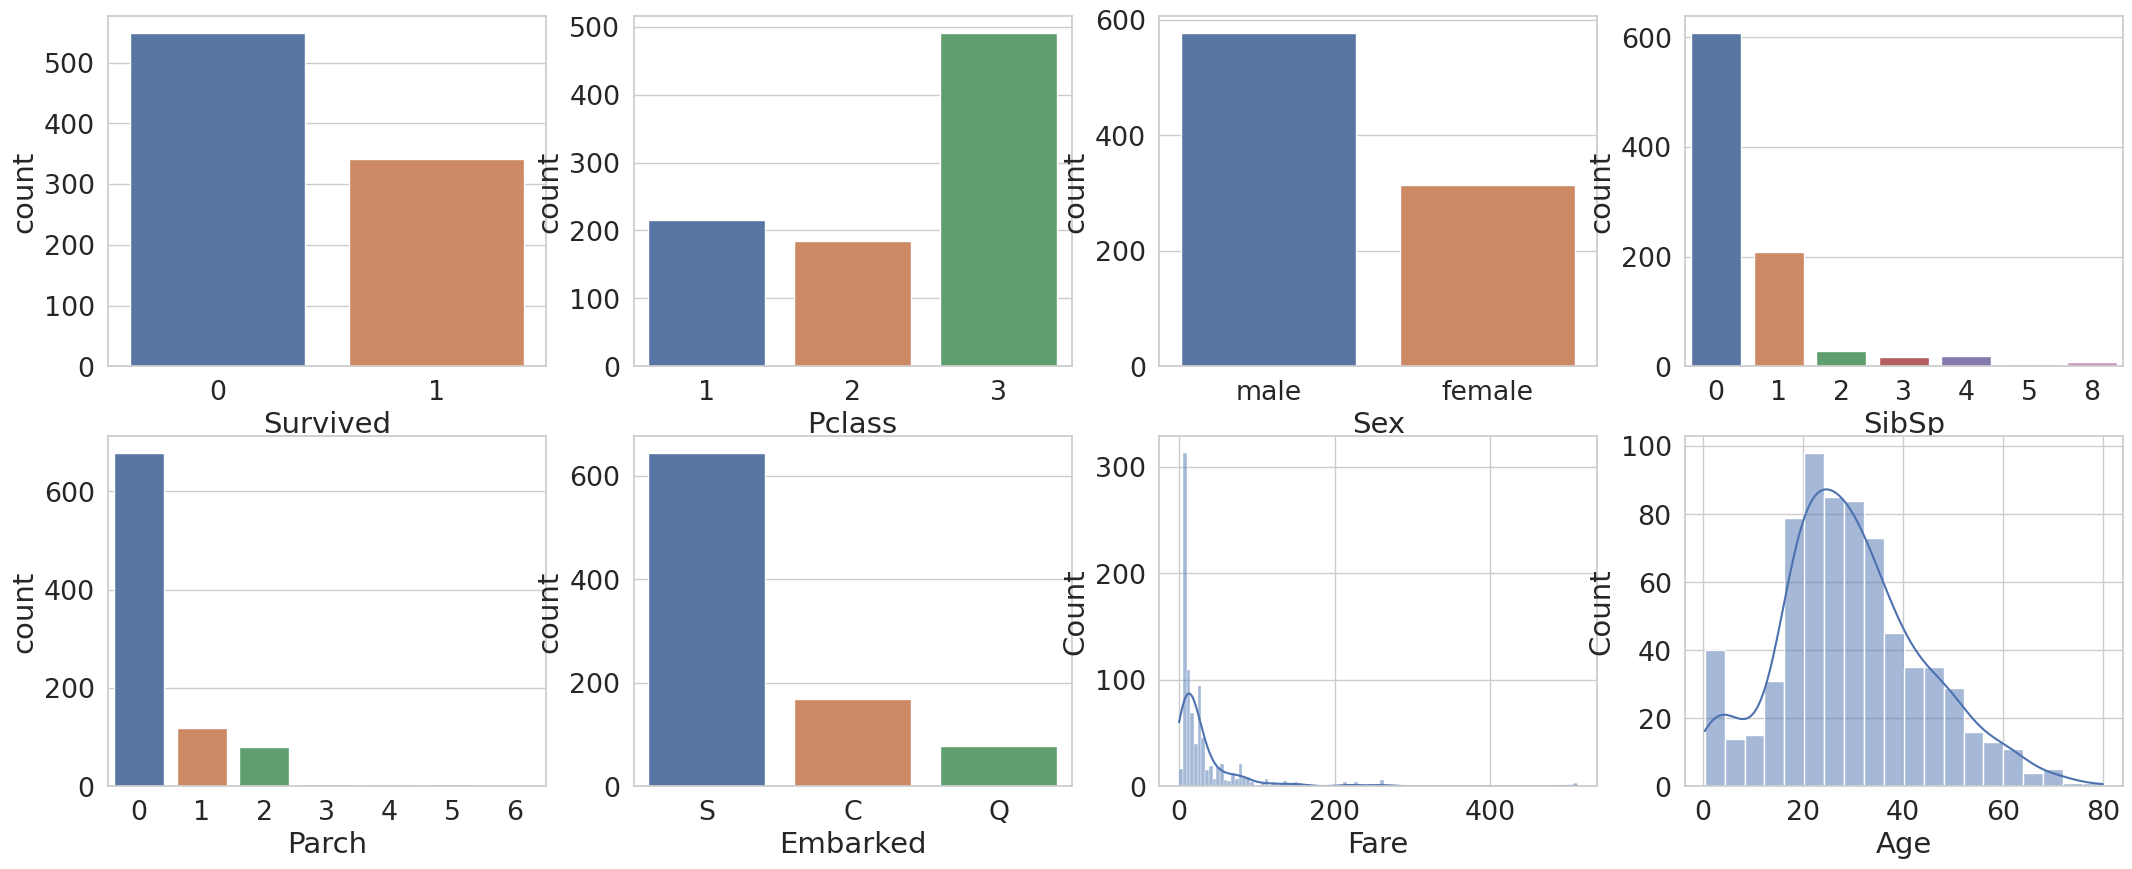

In [34]:
#univariate analysis
fig, axes = plt.subplots(2, 4, figsize=(26, 10))
sns.countplot(x="Survived",data = train,ax=axes[0,0])
sns.countplot(x='Pclass',data=train,ax=axes[0,1])
sns.countplot(x='Sex',data=train,ax=axes[0,2])
sns.countplot(x='SibSp',data=train,ax=axes[0,3])
sns.countplot(x='Parch',data=train,ax=axes[1,0])
sns.countplot(x='Embarked',data=train,ax=axes[1,1])
sns.histplot(train['Fare'], kde=True,ax=axes[1,2])
sns.histplot(train['Age'].dropna(),kde=True,ax=axes[1,3])

We can clearly see that male survial rates is around 20% where as female survial rate is about 75% which suggests that gender has a strong relationship with the survival rates.

There is also a clear relationship between Pclass and the survival by referring to first plot below. Passengers on Pclass1 had a better survial rate of approx 60% whereas passengers on pclass3 had the worst survial rate of approx 22%

<Axes: xlabel='Survived', ylabel='Fare'>

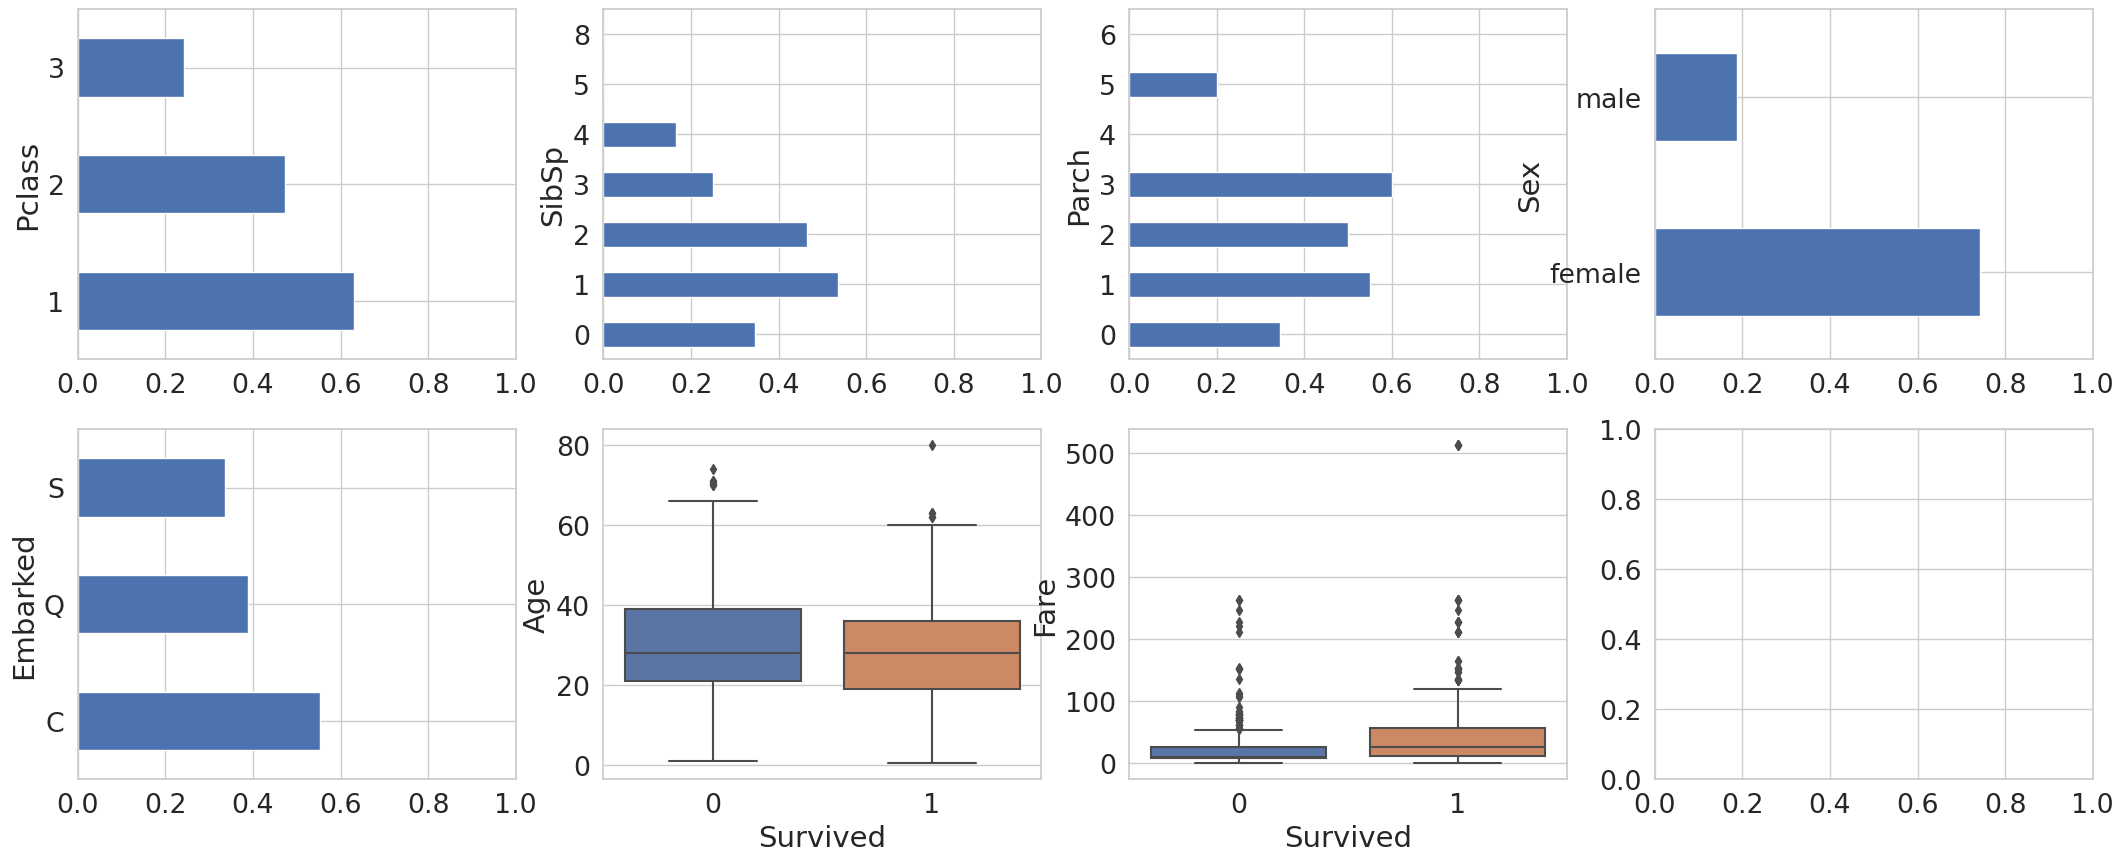

In [36]:
#bivariate analysis
#groupby
figbi, axesbi = plt.subplots(2, 4, figsize=(26, 10))
train.groupby('Pclass')['Survived'].mean().plot(kind='barh',ax=axesbi[0,0],xlim=[0,1])
train.groupby('SibSp')['Survived'].mean().plot(kind='barh',ax=axesbi[0,1],xlim=[0,1])
train.groupby('Parch')['Survived'].mean().plot(kind='barh',ax=axesbi[0,2],xlim=[0,1])
train.groupby('Sex')['Survived'].mean().plot(kind='barh',ax=axesbi[0,3],xlim=[0,1])
train.groupby('Embarked')['Survived'].mean().plot(kind='barh',ax=axesbi[1,0],xlim=[0,1])
sns.boxplot(x="Survived", y="Age", data=train,ax=axesbi[1,1])
sns.boxplot(x="Survived", y="Fare", data=train,ax=axesbi[1,2])

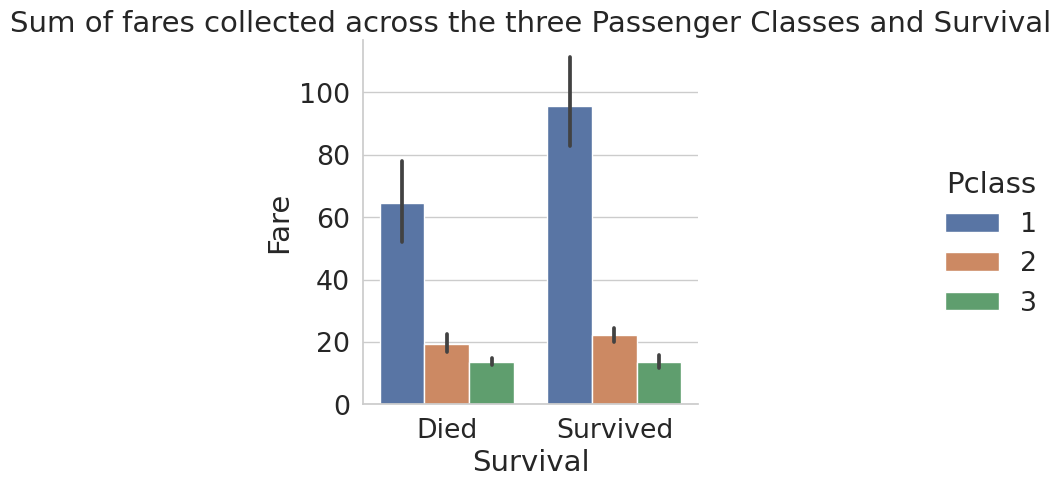

In [66]:
g = sns.catplot(x="Survived", y="Fare", hue="Pclass", data=train.sort_values(by='Pclass'), kind="bar");
g.set(xticklabels=['Died', 'Survived'], xlabel="Survival", title="Sum of fares collected across the three Passenger Classes and Survival")

<ipython-input-37-ba1343b8d293>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.corr()
<ipython-input-37-ba1343b8d293>:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask=np.zeros_like(corr, dtype=np.bool),


<Axes: >

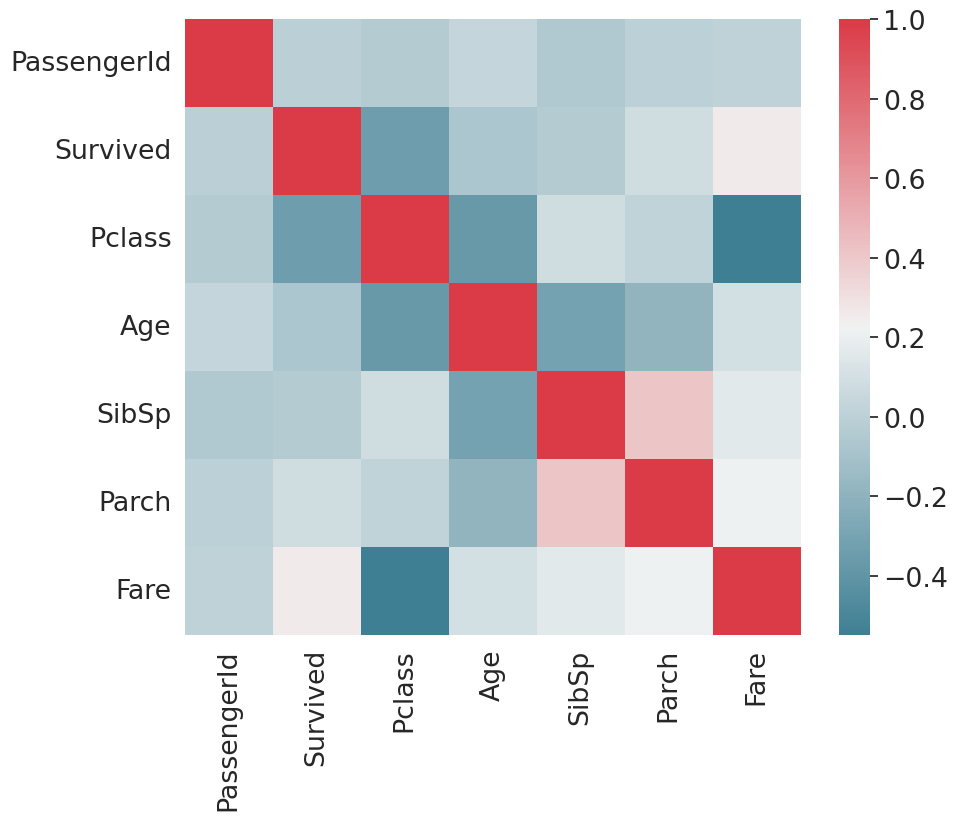

In [37]:
#heatmap
f, ax = plt.subplots(figsize=(10, 8))
corr = train.corr()
sns.heatmap(corr,
            mask=np.zeros_like(corr, dtype=np.bool),
            cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)



---


# Feature Engineering

In [52]:
# create new features
train['Name_len']=train.Name.str.len()

In [53]:
train['Ticket_First']=train.Ticket.str[0]

In [54]:
train['FamilyCount']=train.SibSp+train.Parch

In [55]:
train['Cabin_First']=train.Cabin.str[0]

In [56]:
# Regular expression to get the title of the Name
train['title'] = train.Name.str.extract('\, ([A-Z][^ ]*\.)',expand=False)

In [57]:
train.title.value_counts().reset_index()

,index,title
0,Mr.,517
1,Miss.,182
2,Mrs.,125
3,Master.,40
4,Dr.,7
5,Rev.,6
6,Major.,2
7,Mlle.,2
8,Col.,2
9,Don.,1


In [68]:
def apply_fare_ranges(fare):
    result = []
    mapping = {
           11: "£000 - 010",
           21: "£011 - 020",
           41: "£020 - 040",
           81: "£041 - 080",
          101: "£081 - 100",
          201: "£101 - 200",
          301: "£201 - 300",
          401: "£301 - 400",
          515: "£401 & above"  # in this case the max fare is around £512
    }
    for each_fare in fare.values:
        if type(each_fare) == str:
            result.append(category)
        else:
            category = "Unknown"
            if each_fare != np.nan:
                for each_fare_range in mapping:
                    if  each_fare < each_fare_range:
                        category = mapping[each_fare_range]
                        break
            result.append(category)

    return result

# Fare: ticket fare across the different classes
train['Fare_range'] = apply_fare_ranges(train['Fare'])

In [73]:
def fare_range_with_survival( passenger_class, title):
    dataset = train.copy()
    class_filter = dataset['Pclass'] == passenger_class
    dataset = dataset[class_filter]

    dataset[class_filter]
    g = sns.catplot(y="Fare_range", hue="Survived", data=dataset.sort_values(by='Pclass'), kind="count")
    g.set(ylabel="Fare range", title=title)

    new_labels = ['Died', 'Survived']
    for t, l in zip(g._legend.texts, new_labels):
      t.set_text(l)
    g.fig.set_figwidth(35)

<ipython-input-73-37b1cc74cd5d>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataset[class_filter]
<ipython-input-73-37b1cc74cd5d>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataset[class_filter]
<ipython-input-73-37b1cc74cd5d>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  dataset[class_filter]


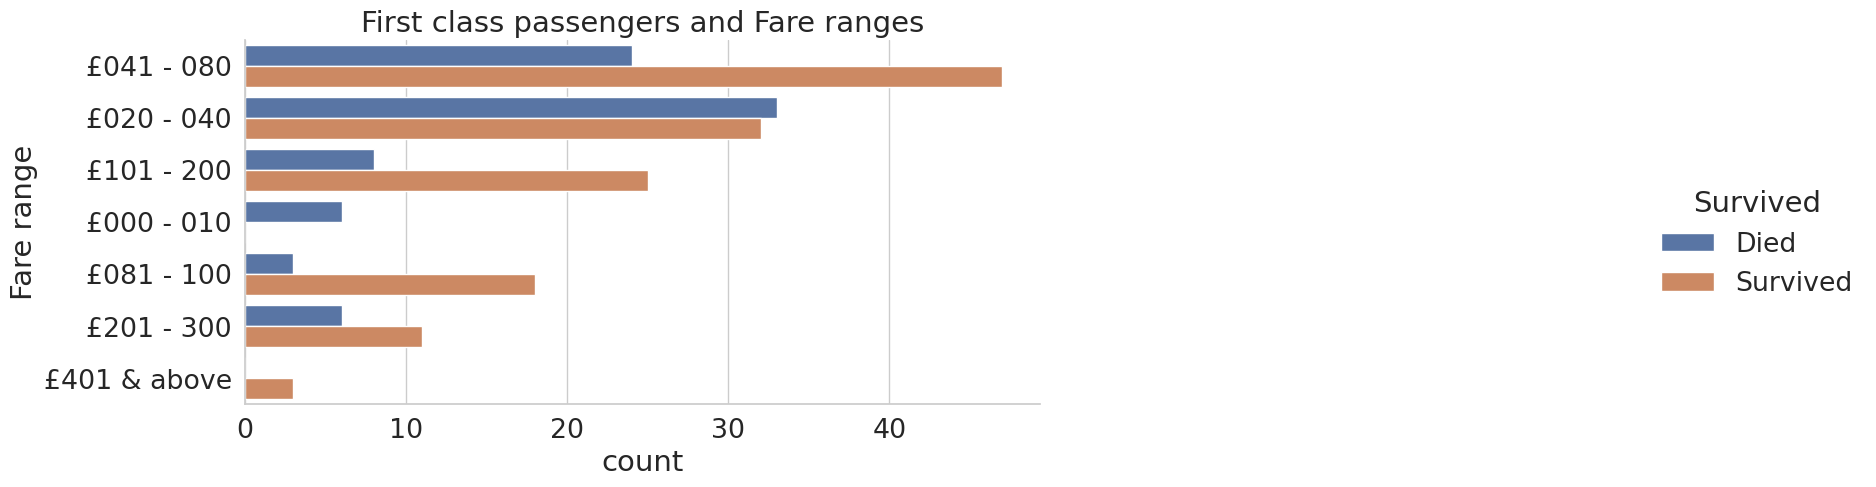

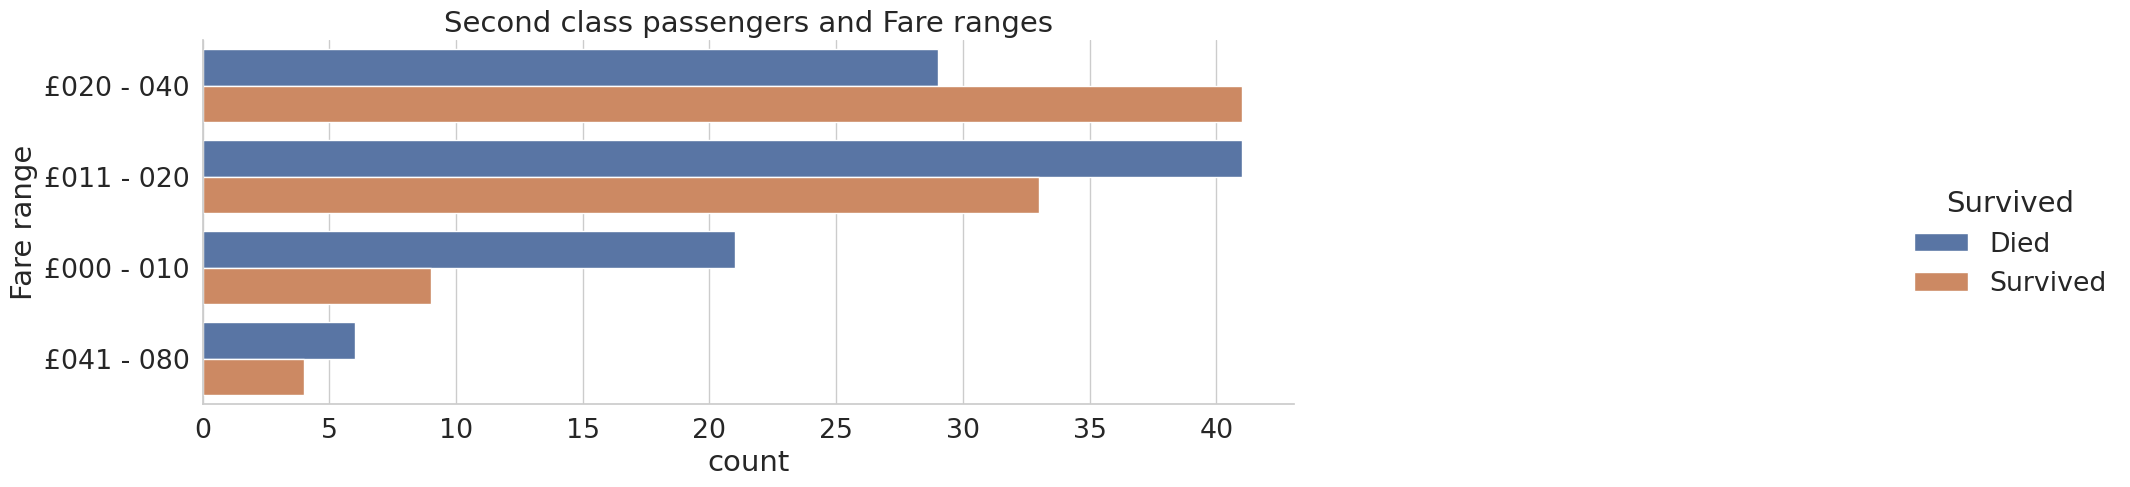

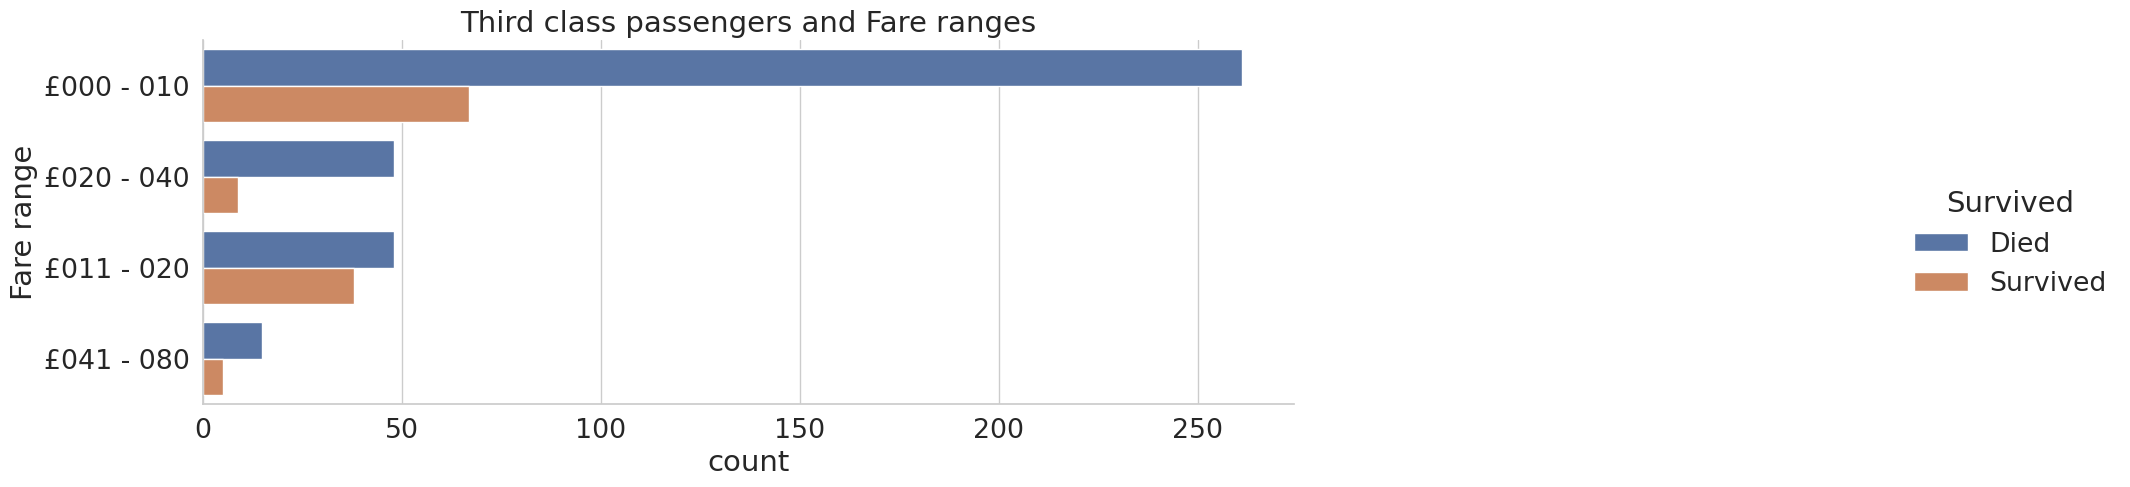

In [79]:
fare_range_with_survival(1, "First class passengers and Fare ranges")
fare_range_with_survival(2, "Second class passengers and Fare ranges")
fare_range_with_survival(3, "Third class passengers and Fare ranges")

**Missing Value treatment**

Having missing values in a dataset can cause errors with some machine learning algorithms and either the rows that has missing values should be removed or imputed
Imputing refers to using a model to replace missing values.

There are many options we could consider when replacing a missing value, for example:

constant value that has meaning within the domain, such as 0, distinct from all other values.
value from another randomly selected record.
mean, median or mode value for the column.
value estimated by another predictive model.


In [58]:
# impute the missing Fare values with the mean Fare value
train.Fare.fillna(train.Fare.mean(),inplace=True)

In [59]:
# impute the missing Age values with the mean Fare value
train.Age.fillna(train.Age.mean(),inplace=True)

sometimes it is more reasonabale to drop the columns

In [60]:
# We see that a majority 77% of the Cabin variable has missing values.
# Hence will drop the column from training a machine learnign algorithem
train.Cabin.isnull().mean()

0.7710437710437711

In [61]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   891 non-null    int64  
 1   Survived      891 non-null    int64  
 2   Pclass        891 non-null    int64  
 3   Name          891 non-null    object 
 4   Sex           891 non-null    object 
 5   Age           891 non-null    float64
 6   SibSp         891 non-null    int64  
 7   Parch         891 non-null    int64  
 8   Ticket        891 non-null    object 
 9   Fare          891 non-null    float64
 10  Cabin         204 non-null    object 
 11  Embarked      889 non-null    object 
 12  Name_len      891 non-null    int64  
 13  FamilyCount   891 non-null    int64  
 14  Cabin_First   204 non-null    object 
 15  title         890 non-null    object 
 16  Ticket_First  891 non-null    object 
dtypes: float64(2), int64(7), object(8)
memory usage: 118.5+ KB


In [69]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Name_len',
       'FamilyCount', 'Cabin_First', 'title', 'Ticket_First', 'Fare_range'],
      dtype='object')

In [63]:
trainML = train[['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare_range', 'Embarked', 'Name_len', 'Ticket_First', 'FamilyCount',
       'title']]

In [64]:
# drop rows of missing values
trainML = trainML.dropna()

In [65]:
# check the datafram has any missing values
trainML.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age             0
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
Name_len        0
Ticket_First    0
FamilyCount     0
title           0
dtype: int64

more information here: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html
